In [92]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns


In [93]:
data = pd.read_csv('hiring.csv')
mean_score = np.mean(data['test_score(out of 10)'])
print(mean_score)


7.857142857142857


In [94]:

data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(mean_score)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [95]:
from num2words import num2words
import random 

In [96]:
num = random.randint(1,12)
text = num2words(num)
text

'three'

In [97]:
data['experience'] = data['experience'].fillna(text)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,three,8.000000,9,50000
1,three,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [98]:
lb_exp = LabelEncoder()
data['experience'] = lb_exp.fit_transform(data['experience'])
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,4,8.000000,9,50000
1,4,8.000000,6,45000
2,1,6.000000,7,60000
3,5,10.000000,10,65000
4,2,9.000000,6,70000
5,4,7.000000,10,62000
6,3,7.857143,7,72000
7,0,7.000000,8,80000


In [99]:
x=data.drop('salary($)',axis='columns')
y= data['salary($)']

In [100]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

In [101]:
model = LinearRegression()

In [102]:
x_train

,experience,test_score(out of 10),interview_score(out of 10)
6,3,7.857143,7
3,5,10.000000,10
1,4,8.000000,6
4,2,9.000000,6
7,0,7.000000,8


In [103]:
model.fit(x_train,y_train)

LinearRegression()

In [104]:
model.predict(x_test)

array([62117.51724779, 61849.61323143, 68809.24063277])

In [105]:
model.score(x_test,y_test)

-1.7152366244748047

In [106]:
cor = data.corr()

<AxesSubplot:>

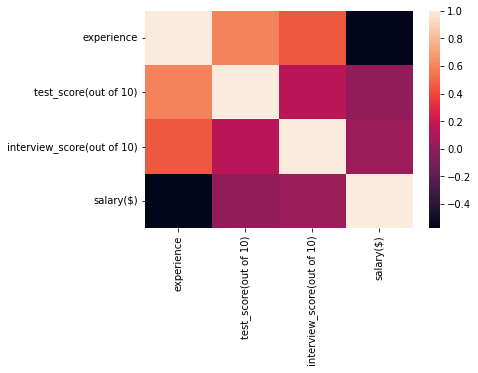

In [107]:
sns.heatmap(data=cor)

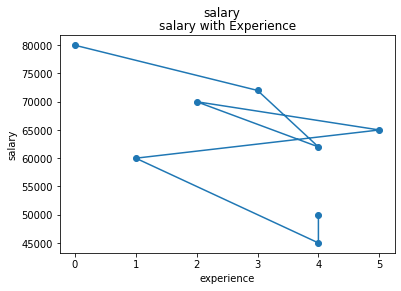

In [114]:
plt.suptitle("salary")
#plt.Subplot(2,2,1)
plt.title("salary with Experience")
plt.xlabel('experience')
plt.ylabel('salary')
plt.plot(data.experience,data['salary($)'],marker='o')